# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [4]:
# Importing libraries for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warningns related to version problems

import warnings
warnings.filterwarnings ('ignore')


In [5]:
# import csv and check data 

advertising =pd.read_csv('advertising.csv', sep = ',')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

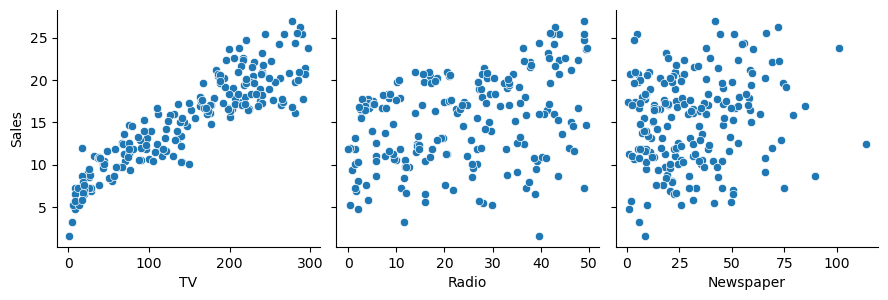

In [8]:
#visualize the data in the advertising dataframe

sns.pairplot(advertising,
            x_vars = ['TV', 'Radio', 'Newspaper'],
            y_vars = ['Sales'],
            kind = 'scatter',
            size=3, aspect=1
            )
plt.show()


## From the graph validate the assumptions of liner regression

- **There is a *linear relationship* between X and Y**
    - • X and Y should display some sort of a linear relationship; otherwise, there is no use of fitting a linear model between them.
- **Error terms are *normally distributed* with mean zero(not X, Y):**
    - There is no problem if the error terms are not normally distributed if you just wish to fit a line and not make any further interpretations.
    - But if you are willing to make some inferences on the model that you have built (you will see this in the coming segments), you need to have a notion of the distribution of the error terms. One particular repercussion of the error terms not being normally distributed is that the p-values obtained during the hypothesis test to determine the significance of the coefficients become unreliable. (You'll see this in a later segment)
    - The assumption of normality is made, as it has been observed that the error terms generally follow a **normal distribution with mean equal to zero** in most cases.
- **Error terms are *independent* of each other:**
    - The error terms should not be dependent on one another (like in a time-series data wherein the next value is dependent on the previous one).
- **Error terms have *constant variance* (homoscedasticity):**
    - The variance should not increase (or decrease) as the error values change.
    - Also, the variance should not follow any pattern as the error terms change.




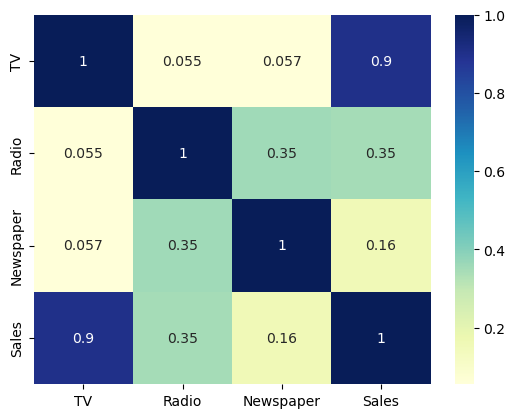

In [9]:
sns.heatmap(advertising.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 3: Performing Simple Linear Regression


- Crate X and Y. 
- Create train and test sets (70-30), (80-20).
- Train your model on the training set i.e. learn the coefficients. 
- Evaluate the model. (training set, test set)


In [10]:
# import libraries

import statsmodels
import statsmodels.api as sm
import sklearn

In [11]:
# Crate X and Y.
X = advertising['TV']
y = advertising['Sales']

In [20]:
# Import method

from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train.shape


(140,)

In [23]:
# Add constant to the model 

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        16:56:36   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""